# Machine Learing
**Sử dụng Machine Learning để dữ đoán các giá trị của tập Medium Gas GreenHouse bao gồm phần Total Gas Emission**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import xgboost as xg
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Final Project /emissions_medium_granularity.csv")
df.head()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    12551 non-null  int64  
 1   parent_entity           12551 non-null  object 
 2   parent_type             12551 non-null  object 
 3   commodity               12551 non-null  object 
 4   production_value        12551 non-null  float64
 5   production_unit         12551 non-null  object 
 6   total_emissions_MtCO2e  12551 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


# Tiền xử lý dữ liệu

# sử dụng với tập new_df để dự đoán total_emissions_MtCO2e

In [ ]:
# xóa cột production_unit
df.drop('production_unit', axis=1, inplace=True)


In [ ]:
le = LabelEncoder()
df[['parent_type', 'parent_entity','commodity']] = df[['parent_type', 'parent_entity','commodity']].apply(LabelEncoder().fit_transform)
print(df)




       year  parent_entity  parent_type  commodity  production_value  \
0      1962              1            2          6           0.91250   
1      1962              1            2          5           1.84325   
2      1963              1            2          6           1.82500   
3      1963              1            2          5           4.42380   
4      1964              1            2          6           7.30000   
...     ...            ...          ...        ...               ...   
12546  2020            121            2          5         394.00000   
12547  2021            121            2          6          90.00000   
12548  2021            121            2          5         403.00000   
12549  2022            121            2          6          98.00000   
12550  2022            121            2          5         423.00000   

       total_emissions_MtCO2e  
0                    0.363885  
1                    0.134355  
2                    0.727770  
3      

In [ ]:
# chia tập train và split theo tỷ lệ 80:20
X = df.drop(['total_emissions_MtCO2e'], axis=1)
y = df['total_emissions_MtCO2e']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Sử dụng phương pháp cross validation kết hợp các model như  Linear Reggression, XGboost Regressor để dự đoán

---



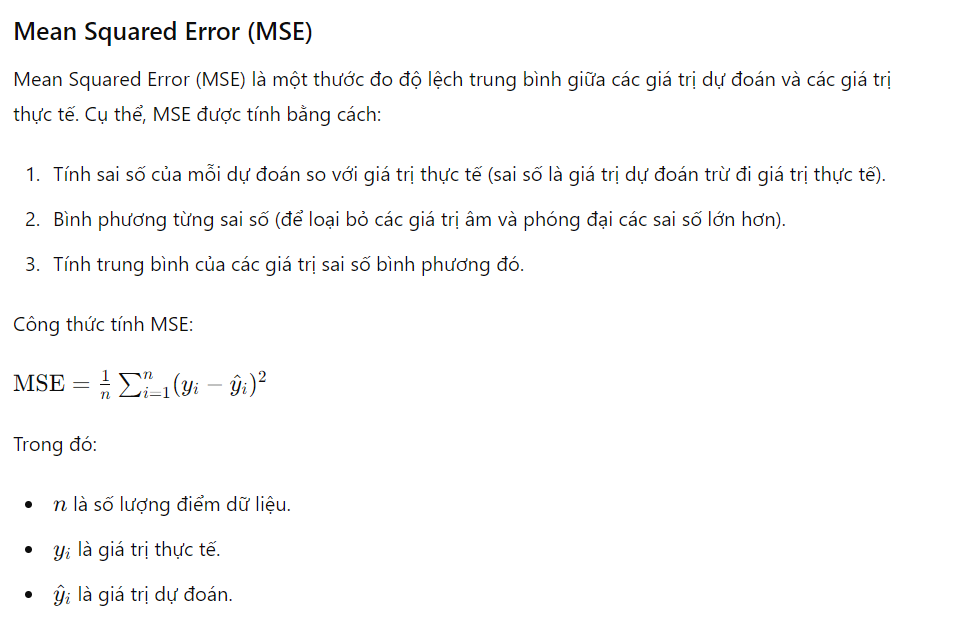

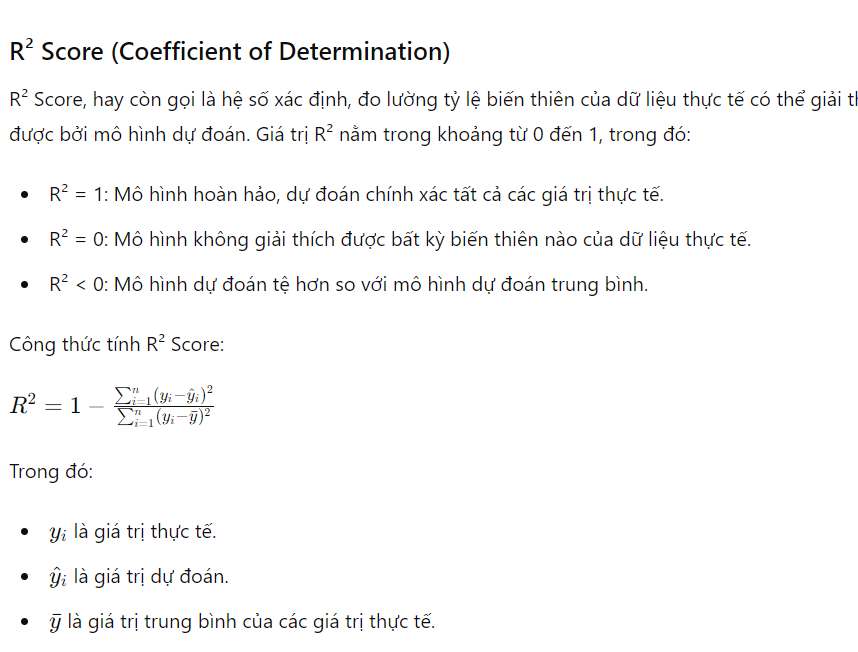

# Linear Reggression

In [ ]:
#Sử dụng cross validation tính r2 score để tránh overfitting
from sklearn.model_selection import cross_val_score
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=10,scoring ='r2')
print(scores)
print(scores.mean())

[0.17367296 0.1867769  0.1821698  0.25380738 0.14798812 0.26272113
 0.18100895 0.21722704 0.1876599  0.1953523 ]
0.19883844787285873


In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=10,scoring ='neg_mean_squared_error')
print(scores)
print(scores.mean())

[-118227.1677069  -106066.31790827  -75523.27949945  -32880.16890808
 -144154.4983271   -43598.42281575 -132359.14474134  -77839.75710049
  -86429.45070872  -98170.52441336]
-91524.8732129453


# XG boost

In [ ]:
# Khởi tạo mô hình XG boost Regression
model_xg = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 2000, seed = 123)
scores_xg = cross_val_score(model_xg, X_train, y_train, cv=10,scoring ='r2')
print(scores_xg)
a = scores_xg.mean()
print(a)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:05:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:05:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:05:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:05:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

[0.99688419 0.9933053  0.99865883 0.9694042  0.99643389 0.99827915
 0.9963975  0.98164852 0.98842767 0.99751884]
0.9916958081655938


In [ ]:
scores_xg_mse = cross_val_score(model_xg, X_train, y_train, cv=10,scoring ='neg_mean_squared_error')
print(scores_xg_mse)
scores_xg_mse_mean = scores_xg_mse.mean()
print(scores_xg_mse_mean)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:06:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:06:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:06:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:06:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

[ -445.79665645  -873.17062369  -123.8515761  -1348.17061642
  -603.36061221  -101.76113782  -582.2094179  -1824.89034543
 -1231.24561028  -302.71259504]
-743.7169191339284


# Lighboost

In [ ]:
# Sử dụng lightboost với cross validation
train_data = lgb.Dataset(X_train, label= y_train)
val_data = lgb.Dataset(X_test, label= y_test, reference=train_data)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'dart',
    'num_leaves': 32,
    'learning_rate': 0.3,
    'feature_fraction': 0.9
}

# Train the model
bst = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    num_boost_round=1000,
  )

# Đánh giá mô hình
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
lgb_mse = mean_squared_error(y_test, y_pred)
lgb_r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {lgb_mse}')
print(f'R^2 Score: {lgb_r2}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 549
[LightGBM] [Info] Number of data points in the train set: 10040, number of used features: 5
[LightGBM] [Info] Start training from score 114.419614
Mean Squared Error: 508.9639067137126
R^2 Score: 0.994488450348694


# Random Forest

In [ ]:
# Random Forest Reggressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=10,scoring ='r2')
print(scores_rf)
print(scores_rf.mean())

[0.99553122 0.99049768 0.99438647 0.99563543 0.98758034 0.99923048
 0.99910982 0.990588   0.99096125 0.99917354]
0.9942694226328042


In [ ]:
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=10,scoring ='neg_mean_squared_error')
print(scores_rf)
print(scores_rf.mean())

# model_cat = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')
# scores_cat = cross_val_score(model_cat, X_train, y_train, cv=10,scoring ='r2')
# print(scores_cat)
# print(scores_cat.mean())

[ -639.37267495 -1239.36029444  -518.38664307  -192.32025694
 -2101.32043996   -45.50509301  -143.86461264  -935.93884279
  -961.68313809  -100.83158559]
-687.8583581473861


# Catboost với RandomizedSearchCV


In [ ]:
# sử dụng catboost với RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'iterations': [10,100,1000],
    'learning_rate': [0.01,0.1,0.3],
    'depth': [3,6,9]}
# build a classifier
model_cat = CatBoostRegressor(loss_function='RMSE')
# Randomized search
random_search = RandomizedSearchCV(model_cat, param_distributions=param_dist,n_iter=20, cv=5)
random_search.fit(X_train, y_train)

print(random_search.best_params_)









Streaming output truncated to the last 5000 lines.
1:	learn: 219.6210786	total: 9.64ms	remaining: 4.81s
2:	learn: 178.5660985	total: 18.2ms	remaining: 6.06s
3:	learn: 147.4873887	total: 22.8ms	remaining: 5.69s
4:	learn: 123.1467322	total: 40.3ms	remaining: 8.03s
5:	learn: 105.2304169	total: 46.5ms	remaining: 7.71s
6:	learn: 91.0368105	total: 51ms	remaining: 7.23s
7:	learn: 79.8916800	total: 53.6ms	remaining: 6.64s
8:	learn: 69.0274987	total: 55.4ms	remaining: 6.1s
9:	learn: 62.2625263	total: 57.2ms	remaining: 5.66s
10:	learn: 59.7164214	total: 58.8ms	remaining: 5.29s
11:	learn: 55.8048233	total: 60.6ms	remaining: 4.99s
12:	learn: 52.6739691	total: 62.4ms	remaining: 4.74s
13:	learn: 50.6891744	total: 63.9ms	remaining: 4.5s
14:	learn: 48.1063999	total: 65.7ms	remaining: 4.32s
15:	learn: 46.5325030	total: 67.4ms	remaining: 4.14s
16:	learn: 44.5732094	total: 68.9ms	remaining: 3.98s
17:	learn: 44.1035901	total: 71ms	remaining: 3.87s
18:	learn: 40.5714644	total: 72.8ms	remaining: 3.76s
19:	l

In [ ]:
model_cat = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')
scores_cat = cross_val_score(model_cat, X_train, y_train, cv=10,scoring ='r2')
print(scores_cat)
print(scores_cat.mean())

Streaming output truncated to the last 5000 lines.
3:	learn: 257.2682896	total: 7.08ms	remaining: 1.76s
4:	learn: 239.3624125	total: 8.96ms	remaining: 1.78s
5:	learn: 223.2925919	total: 10.8ms	remaining: 1.79s
6:	learn: 209.8328292	total: 12.8ms	remaining: 1.82s
7:	learn: 196.5177538	total: 14.7ms	remaining: 1.82s
8:	learn: 185.3927413	total: 16.5ms	remaining: 1.82s
9:	learn: 173.1896074	total: 18.4ms	remaining: 1.82s
10:	learn: 162.2265595	total: 20.2ms	remaining: 1.82s
11:	learn: 152.1203586	total: 22.1ms	remaining: 1.81s
12:	learn: 142.3766258	total: 23.8ms	remaining: 1.81s
13:	learn: 134.9786794	total: 25.8ms	remaining: 1.82s
14:	learn: 127.2739948	total: 27.8ms	remaining: 1.83s
15:	learn: 120.9916381	total: 29.6ms	remaining: 1.82s
16:	learn: 115.1467520	total: 31.4ms	remaining: 1.81s
17:	learn: 108.8177863	total: 33.3ms	remaining: 1.81s
18:	learn: 103.0425271	total: 35.2ms	remaining: 1.82s
19:	learn: 97.9328791	total: 37.1ms	remaining: 1.81s
20:	learn: 92.9184681	total: 39ms	remai

# Decision Tree Regression

> Add blockquote




In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
scores_dt = cross_val_score(model_dt, X_train, y_train, cv=10,scoring ='r2')
print(scores_dt)
print(scores_dt.mean())


[0.87411712 0.99346025 0.99895811 0.91640953 0.90369756 0.9767528
 0.99293026 0.99468546 0.99569346 0.99860081]
0.9645305347782328


In [ ]:
scores_mse_dt = cross_val_score(model_dt, X_train, y_train, cv=10,scoring ='neg_mean_squared_error')
print(scores_mse_dt)
print(scores_mse_dt.mean())

[-15215.3032932    -848.80037666    -86.96718283 -11987.39863767
 -16260.78647568  -1395.89621276   -396.2413497    -525.30740645
   -482.18815775   -396.17763144]
-4759.506672413535


# Polynomial Regression với Bayesian Optimization

In [ ]:
pip install bayesian-optimization

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from bayes_opt import BayesianOptimization
# Hàm mục tiêu để tối ưu hóa degree
def poly_model(degree):
    degree = int(degree)
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return -mse  # Vì bayesian-optimization tìm giá trị lớn nhất, ta trả về -mse

# Định nghĩa không gian tìm kiếm cho degree
pbounds = {'degree': (1,5)}  # Bạn có thể điều chỉnh khoảng tìm kiếm này

# Khởi tạo Bayesian Optimization
optimizer = BayesianOptimization(f=poly_model, pbounds=pbounds, random_state=42)

# Thực hiện tối ưu hóa
optimizer.maximize(init_points=5, n_iter=10)

# Lấy degree tốt nhất từ kết quả tối ưu hóa
best_degree = int(optimizer.max['params']['degree'])

# Huấn luyện mô hình với degree tốt nhất
best_model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
best_model.fit(X_train, y_train)

# Đánh giá mô hình tốt nhất
y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)

print(f'Best Degree: {best_degree}')
print(f'Best Mean Squared Error: {best_mse}')
print(f'Best R^2 Score: {best_r2}')




|   iter    |  target   |  degree   |
-------------------------------------
| 1         | -5.247e+0 | 2.498     |
| 2         | -6.595e+0 | 4.803     |
| 3         | -8.724e+0 | 3.928     |
| 4         | -8.724e+0 | 3.395     |
| 5         | -7.549e+0 | 1.624     |
| 6         | -3.725e+0 | 5.0       |
| 7         | -8.724e+0 | 3.644     |
| 8         | -6.595e+0 | 4.359     |
| 9         | -6.595e+0 | 4.359     |
| 10        | -6.595e+0 | 4.359     |
| 11        | -6.595e+0 | 4.359     |
| 12        | -6.595e+0 | 4.359     |
| 13        | -6.595e+0 | 4.359     |
| 14        | -6.595e+0 | 4.359     |
| 15        | -6.595e+0 | 4.359     |
Best Degree: 5
Best Mean Squared Error: 3724.923534690814
Best R^2 Score: 0.959662953034675


# Support Vector Regressor kết hợp với phương pháp Grid Search để tìm hyperparametor tốt nhất

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer

# Sử dụng Grid Search để tìm các hyperparameters tốt nhất cho SVR
param_grid = {
    'C': [0.1, 1, 10, 100],  # Giá trị C để thử
    'epsilon': [0.01, 0.1, 0.5, 1],  # Giá trị epsilon để thử
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Các kernel để thử
}

svr = SVR()

# Khởi tạo một scorer sử dụng mean_squared_error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(svr, param_grid, scoring=mse_scorer, verbose=1, n_jobs=-1)

# Huấn luyện GridSearchCV
grid_search.fit(X_train, y_train)

# In ra các hyperparameters tốt nhất
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

# Bước 4: Đánh giá mô hình với các hyperparameters tốt nhất
best_svr = grid_search.best_estimator_

# Dự đoán trên tập test
y_pred = best_svr.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Do Grid Search các phương pháp tìm rất lâu trung bình khoảng 3-4h cho máy nên chúng ta sẽ sử dụng luôn SVR các với parameter được sử dụng nhiều để đưa ra kết quả nhanh chóng hơn

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [ ]:
# Sử dụng SVR
model_svr = SVR(kernel='rbf', C=1000, epsilon=0.1)
scores_svr = cross_val_score(model_svr, X_train, y_train, cv=5,scoring ='r2')
print(scores_svr)
print(scores_svr.mean())

[0.12715096 0.17636046 0.10907138 0.13490693 0.14895736]
0.13928941935688294


In [ ]:
model_svr_mse = cross_val_score(model_svr, X_train, y_train, cv=10,scoring ='neg_mean_squared_error')
print(model_svr_mse)

[-125898.07195796 -113362.61626222  -79055.44212697  -33523.21319049
 -157933.80310122  -45841.55090711 -142782.8416635   -83287.88394232
  -91386.55979619 -104199.5979743 ]


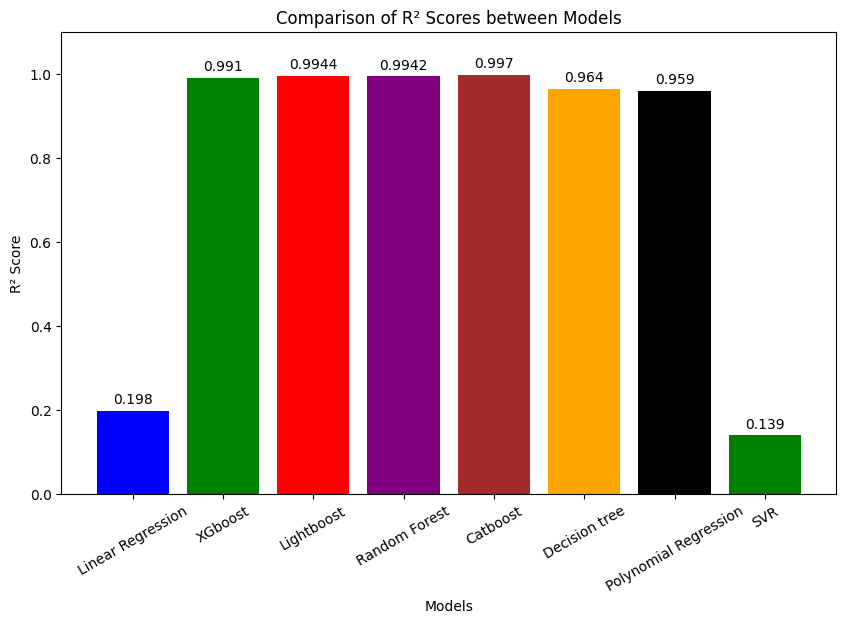

In [ ]:
# So sánh R2 score giữa các model phía trên bằng biểu đồ plot
import matplotlib.pyplot as plt

# Dữ liệu R² score của các mô hình
models = ['Linear Regression', 'XGboost', 'Lightboost','Random Forest','Catboost','Decision tree','Polynomial Regression','SVR']
r2_scores = [0.198, 0.991, 0.9944,0.9942,0.997,0.964,0.959,0.139]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green', 'red','purple','brown','orange','black','green'])

# Thiết lập tiêu đề và nhãn
plt.title('Comparison of R² Scores between Models')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.xticks(rotation = 30)

# Hiển thị giá trị R² score trên đầu mỗi cột
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.01, str(score), ha='center', va='bottom')

# Hiển thị biểu đồ
plt.ylim(0, 1.1)  # Đặt giới hạn trục y từ 0 đến 1
plt.show()



